<a href="https://colab.research.google.com/github/Jholman22/Machine_Learning/blob/main/Algoritmo_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFORME DE AGRUPAMIENTO CON K-MEANS**
**Evidencia:** AA2-EV01  
**Autor:** Jholman Meza Pasinga  
**Fecha:** 23 de junio de 2025

##Introducción
El presente informe detalla el proceso de aplicación del algoritmo de agrupamiento no supervisado K-Means para segmentar un conjunto de datos de clientes. El objetivo es identificar grupos o clusters naturales en los datos basándose en sus características, para permitir una mejor toma de decisiones de negocio. El proceso se documenta siguiendo los pasos requeridos, incluyendo la carga de datos, la creación de una muestra de prueba, el preprocesamiento, el entrenamiento del modelo y la predicción sobre la muestra.
---



## Cargue de datos
El primer paso es cargar el conjunto de datos que se va a analizar. Para esto, utilizamos la librería pandas de Python, una herramienta fundamental para la manipulación y análisis de datos.

In [5]:
# --- Importación de Librerías ---
# pandas: Para la manipulación de datos en formato de tabla (DataFrames).
import pandas as pd
# numpy: Para operaciones numéricas eficientes.
import numpy as np
# seaborn y matplotlib: Para la creación de gráficos y visualizaciones.
import seaborn as sns
import matplotlib.pyplot as plt

# --- Clases de Scikit-learn ---
# KMeans: Contiene el algoritmo de clustering K-Means.
from sklearn.cluster import KMeans
# StandardScaler: Para normalizar/escalar los datos.
from sklearn.preprocessing import StandardScaler

# --- Configuración del Entorno ---
# Permite que los gráficos se muestren directamente en el notebook.
%matplotlib inline
# Establece un estilo visual atractivo para los gráficos.
sns.set(style="whitegrid")

# --- Carga de los Datos ---
# Se lee el archivo CSV y se carga en un DataFrame de pandas.
df = pd.read_csv("Mall_Customers1.csv")

# Se muestra una vista previa de los datos para verificar la carga.
print("--- Primeras 5 filas del dataset original ---")
display(df.head())

--- Primeras 5 filas del dataset original ---


,IDCliente,Genero,Edad,Ingresos Anueales (k$),Puntuacion Gastos (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Este bloque de código prepara el entorno de trabajo importando las librerías necesarias. pandas se usa para manejar los datos, matplotlib y seaborn para visualizar, y scikit-learn para el modelo de K-Means y el preprocesamiento. Finalmente, se carga el archivo "Mall_Customers1.csv" y se muestran sus primeras filas.

##2. Obtención de una muestra de prueba aleatoria:
Se extrae una muestra aleatoria del 20% del conjunto de datos total. Esta muestra se utilizará al final del proceso para realizar predicciones con el modelo ya entrenado.

In [6]:
# --- Creación de la Muestra ---
# Se utiliza el método .sample() para obtener una fracción aleatoria del DataFrame.
# frac=0.2 especifica que queremos el 20% de los datos.
# random_state=42 asegura que la muestra sea siempre la misma en cada ejecución.
muestra = df.sample(frac=0.2, random_state=42)

# Se imprime la muestra para verificar su contenido.
print("--- Muestra aleatoria de datos (20% del total) ---")
display(muestra)

--- Muestra aleatoria de datos (20% del total) ---


,IDCliente,Genero,Edad,Ingresos Anueales (k$),Puntuacion Gastos (1-100)
95,96,Male,24,60,52
15,16,Male,22,20,79
30,31,Male,60,30,4
158,159,Male,34,78,1
128,129,Male,59,71,11
115,116,Female,19,65,50
69,70,Female,32,48,47
170,171,Male,40,87,13
174,175,Female,52,88,13
45,46,Female,24,39,65


El código genera un nuevo DataFrame llamado muestra que contiene un 20% de las filas del DataFrame original, seleccionadas al azar. Esto nos permite simular tener un conjunto de "nuevos clientes" para clasificar más adelante.

##3. Eliminación de Variables que no Aportan al Modelo
Para el análisis de K-Means, se deben utilizar únicamente variables numéricas que describan características de los datos. Las columnas de identificación o categóricas se eliminan.

In [7]:
# --- Selección de Variables Numéricas ---
# Se eliminan las columnas 'IDCliente' y 'Genero' del DataFrame principal.
# 'IDCliente' es un identificador único y no aporta patrones.
# 'Genero' es categórica y K-Means necesita datos numéricos.
df_numerico = df.drop(columns=["IDCliente", "Genero"])

print("\n--- Datos numéricos que se usarán para el modelo ---")
display(df_numerico.head())


--- Datos numéricos que se usarán para el modelo ---


,Edad,Ingresos Anueales (k$),Puntuacion Gastos (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Se crea el DataFrame df_numerico que contiene solo las columnas Edad, Ingresos Anueales (k$) y Puntuacion Gastos(1-100). Estas son las variables que el algoritmo utilizará para encontrar las similitudes entre los clientes.

##4. Realización de Escalamiento (Normalización) de Datos
Las variables tienen diferentes escalas (ej. ingresos vs. edad). El escalamiento es un paso crucial para asegurar que todas las variables contribuyan por igual al cálculo de distancias del algoritmo

In [8]:
# --- Escalamiento de Datos ---
# Se inicializa el objeto StandardScaler.
scaler = StandardScaler()

# Se ajusta el escalador a los datos numéricos y se transforman.
# .fit_transform() calcula la media y desviación estándar y luego aplica la normalización.
df_scaled = scaler.fit_transform(df_numerico)

El código utiliza StandardScaler para normalizar los datos en df_numerico. El resultado, df_scaled, es un array de NumPy donde cada columna tiene una media de 0 y una desviación estándar de 1.

##5. Obtención de Valor Óptimo de K y Aplicación de K-Means
Se aplica el Método del Codo para identificar el número óptimo de clusters (K) a utilizar.

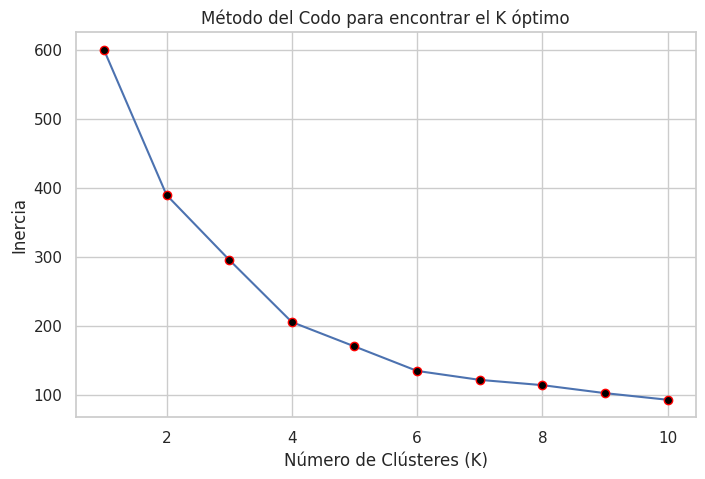

In [9]:
# --- Método del Codo ---
# Se inicializa una lista para guardar los valores de inercia.
inertia = []
# Se define el rango de K a probar (de 1 a 10).
K_range = range(1, 11)

# Se itera sobre cada valor de K.
for k in K_range:
    # Se crea un modelo KMeans para el valor actual de k.
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    # Se entrena el modelo con los datos escalados.
    kmeans.fit(df_scaled)
    # Se almacena la inercia del modelo entrenado.
    inertia.append(kmeans.inertia_)

# --- Gráfico del Codo ---
# Se crea la figura para el gráfico.
plt.figure(figsize=(8, 5))
# Se grafica el número de clusters (K) contra la inercia.
plt.plot(K_range, inertia, marker='o', markerfacecolor='black', markeredgecolor='red')
plt.title('Método del Codo para encontrar el K óptimo')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

 Este bloque calcula la inercia para diferentes números de clusters (de 1 a 10) y la grafica. La "inercia" mide qué tan compactos son los clusters. El gráfico muestra un "codo" pronunciado en K=4, sugiriendo que 4 es el número óptimo de grupos.  
 ¿Cómo se interpreta?    
El eje X representa el número de clústeres (K).

El eje Y muestra la inercia, que es la suma de las distancias cuadradas de cada punto al centro de su clúster. Es decir, una medida de qué tan compactos son los clústeres.

A medida que aumentas K, la inercia disminuye porque hay más centros para agrupar los datos y se reduce la distancia interna. Sin embargo, esto tiene un rendimiento decreciente.

##6. Entrenamiento del Modelo y Obtención de Centroides
Con un valor de K definido, se entrena el modelo final y se extraen las coordenadas de los centroides, que representan el "centro" o el prototipo de cada cluster.

In [10]:
# --- Entrenamiento del Modelo Final ---
# Se crea el modelo KMeans con n_clusters=4, como en el script original.
algoritmo = KMeans(n_clusters=4, random_state=42, n_init='auto')

# Se entrena el modelo y se predicen los grupos para los datos de entrenamiento.
grupos = algoritmo.fit_predict(df_scaled)

# Se agrega la columna con los clusters asignados al DataFrame numérico.
df_numerico["Cluster"] = grupos

# --- Obtención e Interpretación de Centroides ---
# Se obtienen los centroides (están en la escala normalizada).
centroides_escalados = algoritmo.cluster_centers_

# Se aplica la transformación inversa para ver los valores en su escala original.
centroides = scaler.inverse_transform(centroides_escalados)

# Se convierten a un DataFrame para una fácil lectura.
df_centroides = pd.DataFrame(centroides, columns=df_numerico.columns[:-1])
df_centroides["Cluster"] = df_centroides.index

print("\n--- Coordenadas de los Centroides (Valores Reales) para K=4 ---")
display(df_centroides)


--- Coordenadas de los Centroides (Valores Reales) para K=4 ---


,Edad,Ingresos Anueales (k$),Puntuacion Gastos (1-100),Cluster
0,53.984615,47.707692,39.969231,0
1,32.875000,86.100000,81.525000,1
2,25.438596,40.000000,60.298246,2
3,39.368421,86.500000,19.578947,3


El código entrena el modelo final con K=4. fit_predict realiza dos acciones: entrena el modelo y asigna cada cliente de df_numerico a uno de los 4 clusters. Luego, se calculan los centroides y se les aplica la transformación inversa para poder interpretar qué representa cada cluster en términos de edad, ingresos y puntuación de gastos.

##7. Realización de predicción con la muestra obtenida
Este paso es un requisito de la evidencia. El código original no lo incluía, por lo que se añade a continuación para cumplir con el objetivo. Se utiliza el modelo ya entrenado para clasificar los datos de la muestra que se separó en el paso 2.

In [11]:
# --- Preparación de la Muestra para Predicción ---
# 1. Se eliminan las mismas columnas que en el set de entrenamiento.
muestra_numerico = muestra.drop(columns=["IDCliente", "Genero"])

# 2. Se escalan los datos de la muestra USANDO EL MISMO ESCALADOR ('scaler') ya ajustado.
# Es muy importante usar .transform() y no .fit_transform() aquí.
muestra_scaled = scaler.transform(muestra_numerico)

# --- Predicción ---
# 3. Se utiliza el modelo ya entrenado ('algoritmo') para predecir los clusters de la muestra.
predicciones_muestra = algoritmo.predict(muestra_scaled)

# 4. Se añaden las predicciones al DataFrame original de la muestra para su análisis.
muestra['Cluster_Predicho'] = predicciones_muestra

print("\n--- Muestra de Prueba con su Cluster Predicho ---")
display(muestra.head(10))


--- Muestra de Prueba con su Cluster Predicho ---


,IDCliente,Genero,Edad,Ingresos Anueales (k$),Puntuacion Gastos (1-100),Cluster_Predicho
95,96,Male,24,60,52,2
15,16,Male,22,20,79,2
30,31,Male,60,30,4,0
158,159,Male,34,78,1,3
128,129,Male,59,71,11,0
115,116,Female,19,65,50,2
69,70,Female,32,48,47,2
170,171,Male,40,87,13,3
174,175,Female,52,88,13,3
45,46,Female,24,39,65,2


Este bloque crucial toma la muestra de datos, la prepara de la misma manera que los datos de entrenamiento (eliminando columnas y escalando), y luego usa el método .predict() del modelo algoritmo para asignar cada cliente de la muestra a un cluster. El resultado se añade como una nueva columna, completando el ciclo del análisis.

##Conclusión y Visualización Final
Finalmente, se visualizan las relaciones entre las variables, coloreando cada punto según el cluster asignado por el modelo. Esto permite una interpretación visual de la segmentación lograda.

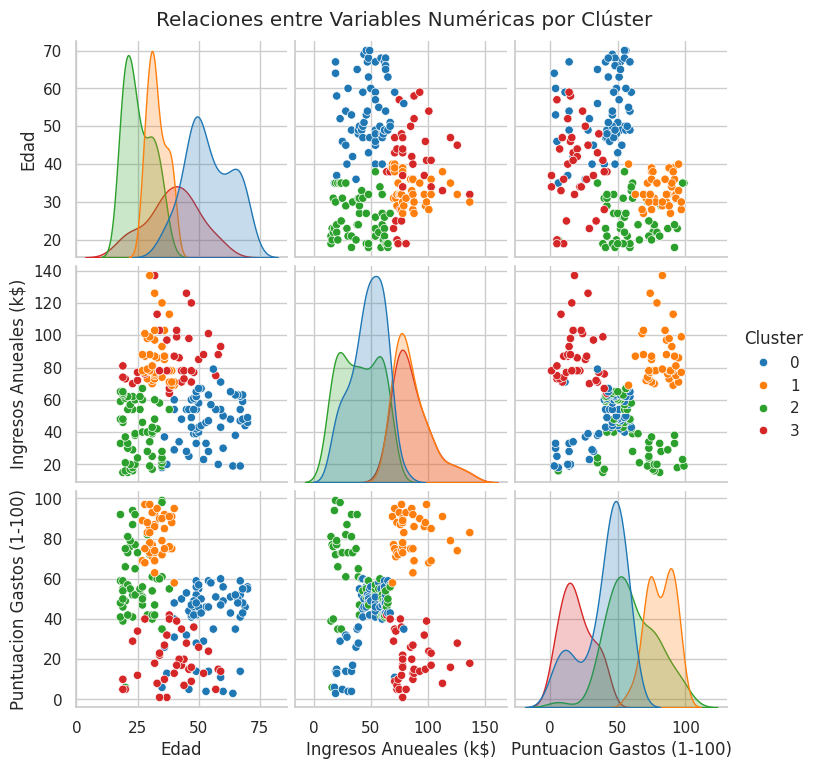

In [12]:
# --- Visualización de los Clusters ---
# sns.pairplot crea una matriz de gráficos de dispersión para ver las relaciones
# entre todas las variables, coloreadas por el cluster asignado.
sns.pairplot(df_numerico, hue="Cluster", palette="tab10")
plt.suptitle("Relaciones entre Variables Numéricas por Clúster", y=1.02)
plt.show()

El pairplot es una herramienta de visualización potente que muestra cómo se agrupan los clientes en cada par de variables. Los colores distintos para cada cluster ayudan a identificar visualmente la efectividad de la segmentación realizada por el algoritmo K-Means. El análisis concluye con una clara separación de los clientes en 4 grupos distintos.